# <font color = 'tomato'>EBUSS RECOMMENDATION SYSTEM </font>

<font color='black'>

#### 1. The e-commerce business is quite popular today. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website.<br><br> 2. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.<br><br>3.  Our aim is to build a model that will improve the recommendations given to the users given their past reviews and ratings.
</font>


#### Steps Involved :

**1. Data Processing** : Reading and understading, cleaning, Missing value treatment

**2. Text Processing** : Tokenization, Lemmmatization

**3. Data Visualization** : To understand length and sentiment of the reviews. To check for class imbalance

**4. Model Building** : Logistic Regression, Multinomial Naive Bayes, Random Forest, XGBoost

**5. Recommendation System**

**6. **Recommed the top 5 products for a particular user**


## <font color = 'purple'> 1. DATA READING & DATA CLEANING</font>

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv
import re 
import string

# To change date to datetime
from datetime import datetime
import time


# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import en_core_web_sm
nlp = en_core_web_sm.load()

In [4]:
# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# reading the dataset

df = pd.read_csv("sample30.csv")
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [6]:
# print the shape and info of the dataframe
print(df.shape)
print(df.info())

(30000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)


In [7]:
# print the columns of the dataframe
list(df.columns)

['id',
 'brand',
 'categories',
 'manufacturer',
 'name',
 'reviews_date',
 'reviews_didPurchase',
 'reviews_doRecommend',
 'reviews_rating',
 'reviews_text',
 'reviews_title',
 'reviews_userCity',
 'reviews_userProvince',
 'reviews_username',
 'user_sentiment']

In [8]:
# No of missing entries in the df
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [9]:
# Percentage of missing entries
round(100*((df.isnull().sum())/len(df)),5)

id                       0.00000
brand                    0.00000
categories               0.00000
manufacturer             0.47000
name                     0.00000
reviews_date             0.15333
reviews_didPurchase     46.89333
reviews_doRecommend      8.56667
reviews_rating           0.00000
reviews_text             0.00000
reviews_title            0.63333
reviews_userCity        93.57000
reviews_userProvince    99.43333
reviews_username         0.21000
user_sentiment           0.00333
dtype: float64

In [10]:
# Drop columns which have more than 90% of missing values. 
# In our case, we have two columns reviews_userCity and reviews_userProvince
# which have > 90% missing values. Hence we can remove those columns.

df = df.drop(columns=['reviews_userCity', 'reviews_userProvince'])

print(df.shape)

(30000, 13)


In [11]:
# Print the % of missing values for each column again 
round(100*((df.isnull().sum())/len(df)),5)

id                      0.00000
brand                   0.00000
categories              0.00000
manufacturer            0.47000
name                    0.00000
reviews_date            0.15333
reviews_didPurchase    46.89333
reviews_doRecommend     8.56667
reviews_rating          0.00000
reviews_text            0.00000
reviews_title           0.63333
reviews_username        0.21000
user_sentiment          0.00333
dtype: float64

In [12]:
# Since we do not need reviews_didPurchase and reviews_doRecommend for our analysis 
# We can drop those two columns as well

df = df.drop(columns=['reviews_didPurchase', 'reviews_doRecommend'])

print(df.shape)

(30000, 11)


In [13]:
# Print the % of missing values for each column again 
round(100*((df.isnull().sum())/len(df)),5)

id                  0.00000
brand               0.00000
categories          0.00000
manufacturer        0.47000
name                0.00000
reviews_date        0.15333
reviews_rating      0.00000
reviews_text        0.00000
reviews_title       0.63333
reviews_username    0.21000
user_sentiment      0.00333
dtype: float64

##### Since we have less number of missing values in other columns, 
##### We can remove those rows where the other columns have less missing values. 



In [14]:
# Drop all those rows where manufacturer is null
df = df[df['manufacturer'].notna()]

# Drop all those rows where reviews_date is null
df = df[df['reviews_date'].notna()]

# Drop all those rows where reviews_title is null
df = df[df['reviews_title'].notna()]

# Drop all those rows where reviews_username is null
df = df[df['reviews_username'].notna()]

# Drop all those rows where user_sentiment is null
df = df[df['user_sentiment'].notna()]


In [15]:
# Print the shape of the dataframe 
df.shape

(29566, 11)

In [16]:
# Print the % of missing values for each column again 
round(100*((df.isnull().sum())/len(df)),5)

id                  0.0
brand               0.0
categories          0.0
manufacturer        0.0
name                0.0
reviews_date        0.0
reviews_rating      0.0
reviews_text        0.0
reviews_title       0.0
reviews_username    0.0
user_sentiment      0.0
dtype: float64

In [17]:
# Remove the prefix word reviews_ from the column names

df.columns = list(map((lambda x : x.lstrip("reviews_") if x.startswith("reviews_") else x), list(df.columns)))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29566 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              29566 non-null  object
 1   brand           29566 non-null  object
 2   categories      29566 non-null  object
 3   manufacturer    29566 non-null  object
 4   name            29566 non-null  object
 5   date            29566 non-null  object
 6   ating           29566 non-null  int64 
 7   text            29566 non-null  object
 8   title           29566 non-null  object
 9   username        29566 non-null  object
 10  user_sentiment  29566 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None


In [18]:
# Correct the column name to rating which got stripped during lstrip
df = df.rename(columns={'ating':'rating'})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29566 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              29566 non-null  object
 1   brand           29566 non-null  object
 2   categories      29566 non-null  object
 3   manufacturer    29566 non-null  object
 4   name            29566 non-null  object
 5   date            29566 non-null  object
 6   rating          29566 non-null  int64 
 7   text            29566 non-null  object
 8   title           29566 non-null  object
 9   username        29566 non-null  object
 10  user_sentiment  29566 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None


In [19]:
# In our case User_sentiment is the target variable which is in the text form 

df['user_sentiment'].value_counts()

Positive    26262
Negative     3304
Name: user_sentiment, dtype: int64

In [20]:
# Let's convert this to a numerical binary value for the classification modeling purpose

df['user_sentiment'] = df['user_sentiment'].apply(lambda x : 1 if x=="Positive" else 0)

df['user_sentiment'].value_counts()

1    26262
0     3304
Name: user_sentiment, dtype: int64

### a. Analysis on the Users and the Items 

In [21]:
# Convert the username, title and text to lowercase incase of any ambiguity

df['username'] = df['username'].apply(lambda x : x.lower())
df['text'] = df['text'].apply(lambda x : x.lower())
df['title'] = df['title'].apply(lambda x : x.lower())

# Use strip to remove leading and trailing white spaces

df['username'] = df['username'].apply(lambda x : x.strip())
df['text'] = df['text'].apply(lambda x : x.strip())
df['title'] = df['title'].apply(lambda x : x.strip())

In [22]:
# No of unique users in the dataframe
df['username'].value_counts()

mike                 41
byamazon customer    41
chris                31
rick                 15
sandy                15
                     ..
shortround715         1
niknik7771            1
taylord18             1
lajlfkajoaiuh         1
guesy                 1
Name: username, Length: 24632, dtype: int64

In [23]:
# No of unique items in the dataframe
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8524
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3324
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1139
                                                                                  ... 
Fantasy Fields Lil' Sports Fan Step Stool - Teamson                                  1
JNH Lifestyles Goldstar 3 Person FAR Infrared Sauna                                  1
Home Health Hairever Shampoo                                                         1
Wilton Black Dots Standard Baking Cups                                               1
Craft Punch Giga Scallop Circle 45 24687534 To 334                                   1
Name: name, Length: 249, dtype: int64

#### From the above two commands, we can say that we have 24,632 unique users and 249 unique items in the dataframe

In [24]:
# We have two interesting columns text and title. 
# Let us check the difference b/w these two columns

print(df['title'].head(3))
print(df['text'].head(3))

0    just awesome
1            good
2            good
Name: title, dtype: object
0    i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                               good flavor. this review was collected as part of a promotion.
2                                                                                                                                                                                                 good flavor.
Name: text, dtype: object


## <font color = 'purple'>2. TEXT PROCESSING</font>

#### There are chances that people might use some hyperlinks in the reviews. Incase any of those are put, we might have to remove them from the reviews to make sure we have only text for the lemmatization.

In [25]:
def check_hyperlink(x):
    if x.find("http:") == -1 or x.find("https:") == -1:
        return 0
    else:
        return 1

check_https = df['text'].apply(check_hyperlink)

In [26]:
check_https.value_counts()

0    29566
Name: text, dtype: int64

##### Since we do not have any hyperlinks in the text, we dont have to remove anything.

In [27]:
df['review'] = df['text']

### a. TOKENIZATION

In [28]:
# Remove all the punctuation marks from the review column
df['review'] = df['review'].str.replace('[^\w\s]','')
df['review'].head()

0                                                                                                               i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy
1                                                                                                                                                                                                                                                   good flavor this review was collected as part of a promotion
2                                                                                                                                                                                                                                                                                                    good flavor
3    i read through the reviews on here before looking in to buying one of the couple

In [29]:
# Removing all the stop words from the review column 

# Instantiate a stopwords object
stop_words = stopwords.words('english')

In [30]:
# define a function to remove the stop words
# remove all the stop words from the sentence after splitting and join it back with a space

def remove_stopwords(text):
    words = [i for i in text.split() if i not in stop_words]
    return ' '.join(words)

In [31]:
# apply the above define function on the reviews dataset

df['review'] = df['review'].apply(remove_stopwords)
df['review'].head()

0                                                                                                                                                                                                  love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1                                                                                                                                                                                                                                                                    good flavor review collected part promotion
2                                                                                                                                                                                                                                                                                                    good flavor
3    read reviews looking buying one couples lubricants ultimately disappointed didnt

### b. LEMMATIZATION

In [32]:
# Create an instance of WordNet Lemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

In [33]:
# Define a function to lemmatize each word of a sentence

def lemmatize_sentence(text):
    sent = [wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return " ".join(sent)

In [34]:
df['review'] = df['review'].apply(lemmatize_sentence)
df['review'] = df['review'].str.strip()
df['review'].head()

0                                                                                                                                                                                                   love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1                                                                                                                                                                                                                                                                    good flavor review collected part promotion
2                                                                                                                                                                                                                                                                                                    good flavor
3    read review looking buying one couple lubricant ultimately disappointed didnt ev

### <font color = 'purple'>3.  DATA VISUALIZATION</font>

### a. Visualize the review length against the number of reviews. 

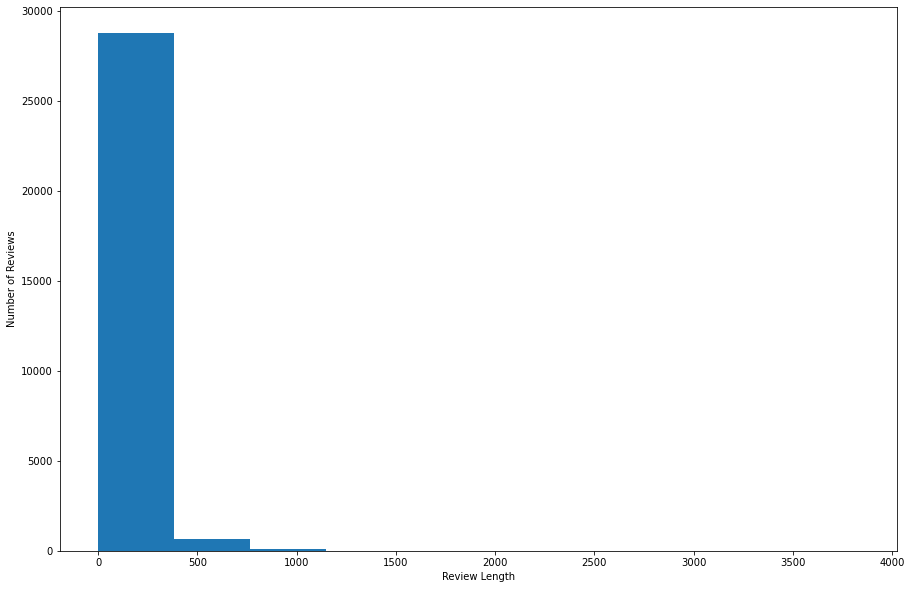

In [35]:
plt.figure(figsize=(15,10))
doc_lens = [len(d) for d in df['review']]
plt.hist(doc_lens, bins = 10)
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

### b. Visualize the percentage of positive and negative reviews

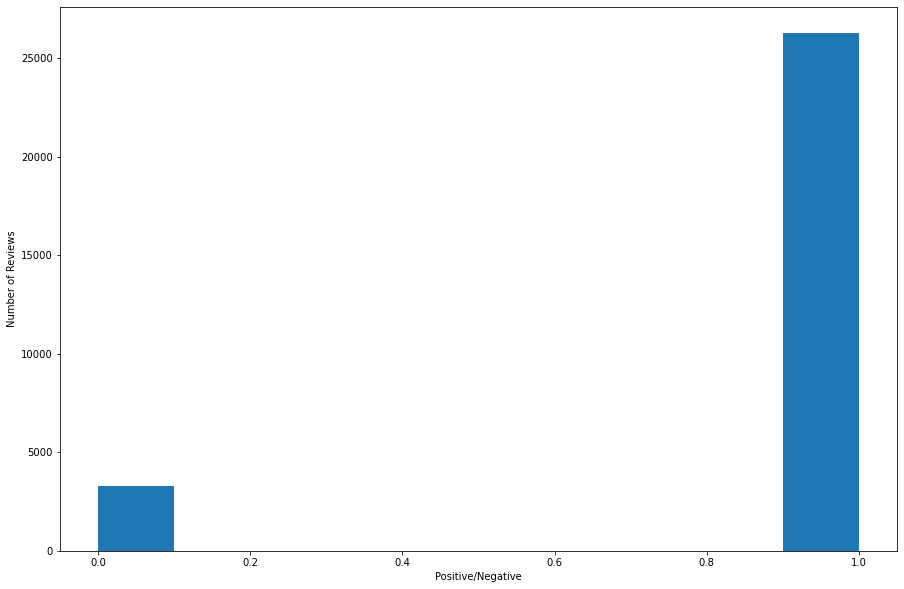

In [36]:
plt.figure(figsize=(15,10))
plt.hist(df['user_sentiment'])
plt.xlabel('Positive/Negative')
plt.ylabel('Number of Reviews')
plt.show()

#### Observations : 
**From the above we can observe that the reviews are majorly Positive. <br> This might be a leading to inaccuracies during modeling due to huge class imbalance.**

In [37]:
# Check the % of positive and negative reviews. 

100*(df['user_sentiment'].value_counts()/len(df['user_sentiment']))

1    88.825002
0    11.174998
Name: user_sentiment, dtype: float64

#### From the above figures, we can conclude that we have ~89% positive reviews and only ~11% negative reviews. This is a sign of HUGE CLASS IMBALANCE

## <font color = 'purple'>4. MODELING</font>

In [38]:
# Assign the X and Y variables
X = df['review']
Y = df['user_sentiment']

In [39]:
# Split the dataset into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
# print the shapes of x_train, x_test, y_train and y_test
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (20696,)
Y_train (20696,)
X_test (8870,)
Y_test (8870,)


In [41]:
# Instantiate a TfIdfVectorizer Object

tfidf = TfidfVectorizer(ngram_range=(1,3), lowercase=True, analyzer='word',stop_words= 'english',
                        token_pattern=r'\w{1,}')

In [42]:
# fit the model
tfidf.fit(X_train)


TfidfVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [43]:
## transforming the train and test datasets
X_train_tf = tfidf.transform(X_train.tolist())
X_test_tf = tfidf.transform(X_test.tolist())

In [44]:
# print  shape of every dataset.
print('X_train_tf', X_train_tf.shape)
print('Y_train', Y_train.shape)
print('X_test_tf', X_test_tf.shape)
print('Y_test', Y_test.shape)

X_train_tf (20696, 365661)
Y_train (20696,)
X_test_tf (8870, 365661)
Y_test (8870,)


#### Since we saw huge class imbalance in the previous outputs, its better we rectify it first before training the model

In [45]:
# Instantiate the Smote class object
smote = SMOTE()

In [46]:
# Apply smote resampling on the train and test sets.
X_train_tf, Y_train = smote.fit_resample(X_train_tf, Y_train)
X_test_tf, Y_test = smote.fit_resample(X_test_tf, Y_test)

In [47]:
# Print the shape of each dataset.
print('X_train_tf', X_train_tf.shape)
print('Y_train', Y_train.shape)
print('X_test_tf', X_test_tf.shape)
print('Y_test', Y_test.shape)

X_train_tf (36796, 365661)
Y_train (36796,)
X_test_tf (15728, 365661)
Y_test (15728,)


### <font color='purple'>ML MODELS</font>

### Define a function which does all the modeling, displaying metrics, roc-auc curves based on the model which we are going to send as the input. 

In [48]:
def model_fit(X_train_tf, Y_train, X_test_tf, Y_test, ml_model, coef_show):
    
    model = ml_model.fit(X_train_tf, Y_train)
    model_train_pred = model.predict(X_train_tf)
    model_test_pred = model.predict(X_test_tf)
    accuracy_train = model.score(X_train_tf, Y_train)
    accuracy_test = model.score(X_test_tf, Y_test)
    model_performance = classification_report(Y_test, model_test_pred)
    validation_pred_proba_grad = model.predict_proba(X_test_tf)
    roc_auc = roc_auc_score(Y_test, validation_pred_proba_grad[:,1])
    
    print("***** Accuracy of the Train model: ", accuracy_train, " *******")
    print("***** Accuracy of the Test model: ", accuracy_test, " *******")
    print('')
    print(model_performance)
    print('')
    print("***** ROC_AUC score: ", roc_auc, " *******")
    print("*************************************************")
    
    if coef_show == True:
        featureNames = tfidf.get_feature_names()
        coef = model.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : featureNames, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print("************ Top 10 positive features (variables) ************")
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print("************ Top 10 negative features (variables) ************")        
        print(coeff_df.tail(20).to_string(index=False))
    
    print("Confusion matrix for train and test set")

    plt.figure(figsize=(10,5))

    c_train = confusion_matrix(Y_train, model_train_pred)
    c_test = confusion_matrix(Y_test, model_test_pred)
    
    plt.subplot(1,2,1)
    sns.heatmap(c_train/np.sum(c_train), annot=True , fmt = ' .2%', cmap="Dark2_r")

    plt.subplot(1,2,2)
    sns.heatmap(c_test/np.sum(c_test), annot=True , fmt = ' .2%', cmap="Dark2_r")

    plt.show()
    
    # Calculate Sensitivity and Specificity
    true_neg = c_test[0, 0]
    false_pos = c_test[0, 1]
    false_neg = c_test[1, 0]
    true_pos = c_test[1, 1]
    
    sensitivity = true_pos/(false_neg+true_pos)
    print("Sensitivity is : ",sensitivity)
    
    specificity = true_neg/(false_pos+true_neg)
    print("Specificity is : ",specificity)

    
    return model

### a. LOGISTIC REGRESSION

In [49]:
# Instantiate a logistic regression object

logistic_regression = LogisticRegression()

***** Accuracy of the Train model:  0.9861669746711599  *******
***** Accuracy of the Test model:  0.8800228891149542  *******

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7864
           1       0.82      0.97      0.89      7864

    accuracy                           0.88     15728
   macro avg       0.89      0.88      0.88     15728
weighted avg       0.89      0.88      0.88     15728


***** ROC_AUC score:  0.9643550609600233  *******
*************************************************

************ Top 10 positive features (variables) ************
      Word  Coefficient
     great    23.389703
      love    16.803315
      good    14.375751
      best    12.996225
     clean    12.838765
      easy    11.799165
    better     9.324232
     loved     8.811502
      nice     7.744061
   awesome     7.454584
    really     6.965798
 excellent     6.947819
   perfect     6.919525
   amazing     6.290153
   enjoyed     6.023

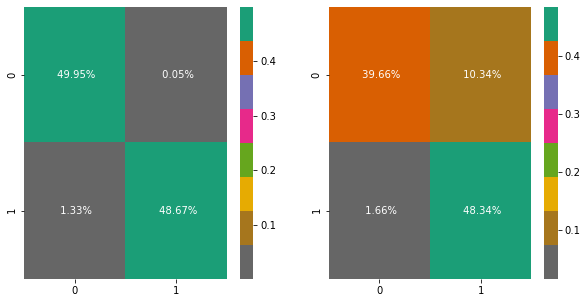

Sensitivity is :  0.9668107833163785
Specificity is :  0.79323499491353


In [50]:
# Use the above defined function to create the Logistic regression model

lr_model = model_fit(X_train_tf, Y_train, X_test_tf, Y_test, logistic_regression, True)

### b. MULTINOMIAL NAIVE BAYES

In [51]:
# Instantiate a naive bayes object

mnb = MultinomialNB()

***** Accuracy of the Train model:  0.987661702358952  *******
***** Accuracy of the Test model:  0.7527339776195321  *******

              precision    recall  f1-score   support

           0       0.90      0.57      0.70      7864
           1       0.68      0.94      0.79      7864

    accuracy                           0.75     15728
   macro avg       0.79      0.75      0.74     15728
weighted avg       0.79      0.75      0.74     15728


***** ROC_AUC score:  0.9260165048965683  *******
*************************************************

************ Top 10 positive features (variables) ************
                       Word  Coefficient
                      great    -7.154211
                       love    -7.206528
                      movie    -7.293303
                     review    -7.354025
        collected promotion    -7.371052
           review collected    -7.371052
 review collected promotion    -7.371052
                  collected    -7.371076
            

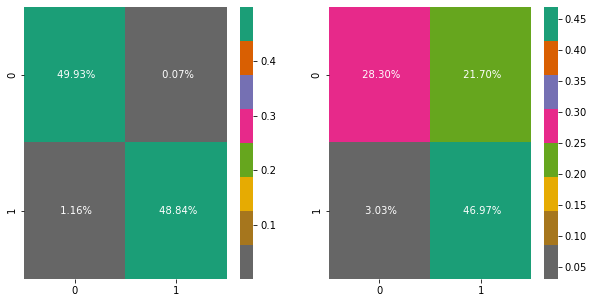

Sensitivity is :  0.939471007121058
Specificity is :  0.565996948118006


In [52]:
# Use the above defined function to create the naive bayes model

nb_model = model_fit(X_train_tf, Y_train, X_test_tf, Y_test, mnb, True)

### c. RANDOM FOREST

In [53]:
# Instantiate a Random Forest Classifier object

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=500, random_state=100, oob_score=True)

***** Accuracy of the Train model:  0.7993531905641917  *******
***** Accuracy of the Test model:  0.7748601220752798  *******

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7864
           1       0.76      0.80      0.78      7864

    accuracy                           0.77     15728
   macro avg       0.78      0.77      0.77     15728
weighted avg       0.78      0.77      0.77     15728


***** ROC_AUC score:  0.851151342597815  *******
*************************************************
Confusion matrix for train and test set


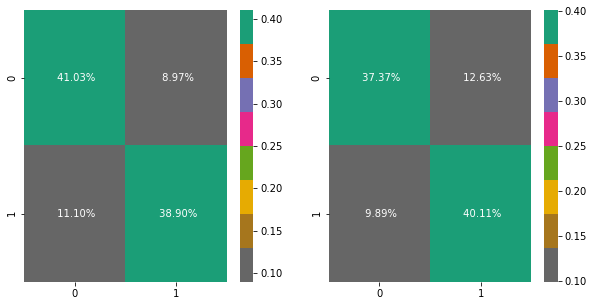

Sensitivity is :  0.802263479145473
Specificity is :  0.7474567650050865


In [54]:
# Use the above defined function to create the random forest model

rf_model = model_fit(X_train_tf, Y_train, X_test_tf, Y_test, random_forest, False)

### d. XGBoost

In [55]:
# define some hyperparameters for hyper parameter tuning
estimators = [10,20,30]
samples_leaf = [1,2,3,4]
depth = [4,5]
samples_split = [6,8,10]
features = ['auto', 'sqrt']


# instantiate the grid using the above hyper paramegters
random_grid = {'n_estimators': estimators, 'max_features': features,
               'max_depth': depth, 'min_samples_split': samples_split,
               'min_samples_leaf': samples_leaf}

# Create a XGB Classifier object 
xgb = xgb.XGBClassifier(n_jobs=-1)

# Using GridCV, find out the best hyperparameter
xgb_final = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=5, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


xgb_final.fit(X_train_tf, Y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[23:19:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:19:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [56]:
# Check the best esimator
xgb_final.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=3,
              min_samples_split=6, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# Assign the best estimator to a variable for future use
xgb_obj = xgb_final.best_estimator_

[23:19:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:19:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** Accuracy of the Train model:  0.8981954560278291  *******
***** Accuracy of the Test model:  0.8755086469989827  *******

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7864
           1       0.89      0.86      0.87      7864

    accuracy         

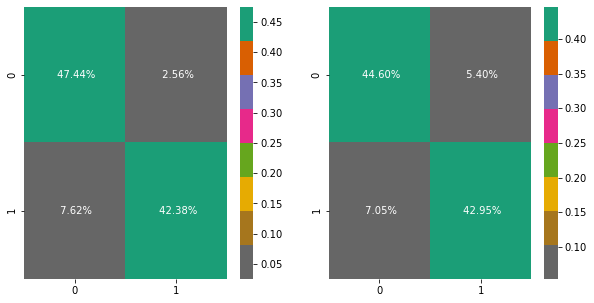

Sensitivity is :  0.8589776195320448
Specificity is :  0.8920396744659207


In [58]:
# Fit the model using the best estimator
xgb_model = model_fit(X_train_tf, Y_train, X_test_tf, Y_test, xgb_obj, False)

In [59]:
# Create a dataframe of all the metrics for all the above models
metrics_all = {'LR' : [88,88,93,84,96], 'MNB' : [80,79,92,67,91],
               'RF' : [76,76,76,76,84], 'XGBoost' :[87,87,84,91,95]}
metrics_df = pd.DataFrame(metrics_all, index=['F1-score', 'Accuracy', 'Sensitivity', 'Specificity', 'ROC-AUC score'])
metrics_df

,LR,MNB,RF,XGBoost
F1-score,88,80,76,87
Accuracy,88,79,76,87
Sensitivity,93,92,76,84
Specificity,84,67,76,91
ROC-AUC score,96,91,84,95


In [60]:
# Lets create a set of sample sentences to predict the classes 

sample_sent = ["i loved the product it is amazing", "the quality is very bad", "perfect brush",
              "cheap texture on comb", "daughter loved the chocolates"]

sample_sent = tfidf.transform(sample_sent)

In [61]:
# predict the classes for the above sample sentence 
print("Logistic regression : ")
print(lr_model.predict(sample_sent))
print("Multinomial Naive Bayes : ")
print(nb_model.predict(sample_sent))
print("Random Forest ")
print(rf_model.predict(sample_sent))
print("XGBoost")
print(xgb_model.predict(sample_sent))

Logistic regression : 
[1 0 1 0 1]
Multinomial Naive Bayes : 
[1 0 1 1 1]
Random Forest 
[1 0 1 0 0]
XGBoost
[1 0 1 0 1]


### From the above metrics, as well as sample prediction, we clearly observe that the Logistic regression model and XGBoost are working better when compared to the other models. Due to time complexity issues, we can consider <b><u>Logistic regression</u></b> for the recommendation purpose

## <font color = 'purple'>5. RECOMMENDATION SYSTEM</font>

In [62]:
# Copy the original df to a new dataframe 

reviews = df

reviews.head()

,id,brand,categories,manufacturer,name,date,rating,text,title,username,user_sentiment,review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,just awesome,joshua,1,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,good flavor. this review was collected as part of a promotion.,good,dorothy w,1,good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,good flavor.,good,dorothy w,1,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did ...",disappointed,rebecca,0,read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivatin...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,irritation,walker557,0,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel


In [63]:
# Check if any of the columns have null values 
# Though we have checked it earlier for the original df, making sure we dont have any null values

reviews.isnull().sum()

id                0
brand             0
categories        0
manufacturer      0
name              0
date              0
rating            0
text              0
title             0
username          0
user_sentiment    0
review            0
dtype: int64

##### We do not have any missing or null values

In [64]:
# Check the rating column of the dataframe 

reviews.rating.value_counts()

5    20566
4     5933
1     1357
3     1309
2      401
Name: rating, dtype: int64

#### We also observed that there were around 25k users and 250 items in the dataset

In [65]:
# Diving the dataset into train and test 

train_df, test_df = train_test_split(reviews, train_size=0.7, test_size=0.3, random_state=100)

print(train_df.shape)
print(test_df.shape)

(20696, 12)
(8870, 12)


In [66]:
# Create a temporary pivot table with index as username 
# and the items as the columns to which the user has given a rating for.

user_pt = reviews.pivot_table(index='username', columns='name', values='rating').fillna(0)

user_df = pd.DataFrame(user_pt)

print(user_df.shape)
user_df.head()

(24632, 249)


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent,

In [67]:
# Create a dummy_train dataframe such that this 
# df will be used for prediction of the items which the user has not rated yet.

train_dummy = train_df.copy()

print(train_dummy.shape)
train_dummy.head()

(20696, 12)


,id,brand,categories,manufacturer,name,date,rating,text,title,username,user_sentiment,review
6367,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...",Hormel,"Hormel Chili, No Beans",2017-02-15T00:00:00.000Z,5,this is the best canned chili ever! quick and easy on the rough nights when i don't have time.,always great,buzzlightyearsmom,1,best canned chili ever quick easy rough night dont time
22907,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-10-25T00:00:00.000Z,1,that was the wrist movie i've seen and i am a big godzilla fan.,trouble,jackie,0,wrist movie ive seen big godzilla fan
26315,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,Movies & TV,Instawatch Movies By VUDU,Shop Instawatch,Ultimate Editions,DTS,Movies & Music,Movies & TV Shows",Lions Gate,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),2017-01-27T00:00:00.000Z,5,this is a wonderful movie and best buy delivered quickly to my house.,great movie,tina,1,wonderful movie best buy delivered quickly house
22137,AVpf--o9LJeJML43G_Fq,Vaseline,"Personal Care,Skin Care,Hand Cream,Beauty,Body Lotions & Creams,Featured Brands,Health & Beauty,Unilever,Holiday Shop,Christmas,Bath & Body,Hand Creams & Lotions,Nail Care, Manicure & Pedicure,Hand & Nail Treatment Creams,Moisturizers",Vaseline,Vaseline Intensive Care Healthy Hands Stronger Nails,2015-09-08T00:00:00.000Z,5,i love this product. i keep a tube in my kitchen for after i'm done cleaning up. my cuticles and nails are noticeably better when using this regularly. my only complaint is i couldn't find any in the stores. had to order online. was happy i was able to do that.,better than many more expensive products,daaby,1,love product keep tube kitchen im done cleaning cuticle nail noticeably better using regularly complaint couldnt find store order online happy able
286,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-06-01T00:00:00.000Z,5,i skin has improved while using this product. before using this product my skin was flakey. now my skin is soft and much improved this review was collected as part of a promotion.,moisturizer,lefty1,1,skin improved using product using product skin flakey skin soft much improved review collected part promotion


In [68]:
# As we know we need to mark the items which have not been rated by the user as 1
train_dummy.rating = train_dummy.rating.apply(lambda x : 0 if x>=1 else 1)

In [69]:
# check the unique values and the value counts 
print(train_dummy.rating.value_counts())

print(train_dummy.rating.unique())

0    20696
Name: rating, dtype: int64
[0]


#### From the above we see that there all the ratings are 0 i.e., every item has a rating already.

In [70]:
# Convert the dummy train dataset into matrix format.
train_dummy = train_dummy.pivot_table(index='username', columns='name', values='rating').fillna(1)

In [71]:
print(train_dummy.shape)
train_dummy.head()

(18046, 231)


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal

#### Cosine Similarity <br>

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] <br>

#### Adjusted Cosine <br>

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

 ### Adjusted Cosine Similarity

In [72]:
# Create a pivot table for the user-item matrix
train_df_pt = train_df.pivot_table(index='username', columns='name', values='rating')

In [73]:
print(train_df_pt.shape)
train_df_pt.head()

(18046, 231)


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal

In [74]:
# Normalising the rating of each user around 0 mean 
# This does the mean for each row as the axis is 1
mean = np.nanmean(train_df_pt, axis=1)

print(mean)
print(sum(mean))
print(len(mean))

[2. 3. 5. ... 2. 5. 4.]
81425.98214285714
18046


In [75]:
# subtract the mean from the train df and transpose
train_df_sub = (train_df_pt.T - mean).T

train_df_sub.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal

In [76]:
# finding cosine similarity with NaN

user_correlation_sub = 1 - pairwise_distances(train_df_sub.fillna(0), metric='cosine')
user_correlation_sub[np.isnan(user_correlation_sub)] = 0
print(user_correlation_sub)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [77]:
print(sum(sum(user_correlation_sub)))

1285.2925793088236


In [78]:
print(user_correlation_sub.shape)

(18046, 18046)


### a. Prediction - User User <br>
Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [79]:
# Remove negative correlations among the users
user_correlation_sub[user_correlation_sub<0]=0
user_correlation_sub

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
#Check if there are legitimate values in the correlation matrix
sum(sum(user_correlation_sub))

7910.586449761983

#### Sum is > 0 which means there are some legitimate values (not all zero)

In [81]:
user_pred_rating = np.dot(user_correlation_sub, train_df_pt.fillna(0))
user_pred_rating

array([[0.        , 0.75592895, 0.        , ..., 5.88242553, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
# Check if ths sum is legitimate
print(user_pred_rating.shape)
sum(sum(user_pred_rating))

(18046, 231)


93565.05790294414

#### Since we are interested only in the items not rated by the user, we will ignore the items rated by the user by making it zero.

In [83]:
user_final_rating = np.multiply(user_pred_rating,train_dummy)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal

#### Check for our algorithm correctness - Sum the numbers by items to see if anything meaningful is arrived at. For these items, check in the excel sheet and pick a user (who is in the train data set) and get recommendations for her.

In [84]:
print(user_final_rating.T.sum(axis=1).sort_values(ascending=False)[0:60])

name
Mike Dave Need Wedding Dates (dvd + Digital)                                                               4595.844312
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                                        4380.091791
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                            3963.514276
The Resident Evil Collection 5 Discs (blu-Ray)                                                             3554.129521
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                                       3473.063508
Red (special Edition) (dvdvideo)                                                                           3015.464343
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                  2718.149557
Clorox Disinfecting Bathroom Cleaner                                                                       2022.626946
Tostitos Bite Size Tortilla Chips          

In [85]:
# This block will execute only if 'user' is in the training dataset.
d = user_final_rating.loc['chris'].sort_values(ascending=False)[0:10]
d

name
Clorox Disinfecting Bathroom Cleaner                                  7.825718
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total             6.947949
Red (special Edition) (dvdvideo)                                      6.262575
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)          5.765230
Tostitos Bite Size Tortilla Chips                                     5.100916
Meguiars Interior Detailer Wipes 25ct                                 2.873234
Meguiar's Deep Crystal Car Wash 64-Oz.                                2.873234
Tostitos Simply Blue Corn Tortilla Chips                              2.873234
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz    2.425989
Burt's Bees Lip Shimmer, Raisin                                       2.213873
Name: chris, dtype: float64

### Finding the top 20 recommendations for the user

In [86]:
user_input = input("Enter user name ")
print(user_input)

Enter user name chris
chris


In [87]:
top20 = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
top20

name
Clorox Disinfecting Bathroom Cleaner                                               7.825718
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          6.947949
Red (special Edition) (dvdvideo)                                                   6.262575
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                       5.765230
Tostitos Bite Size Tortilla Chips                                                  5.100916
Meguiars Interior Detailer Wipes 25ct                                              2.873234
Meguiar's Deep Crystal Car Wash 64-Oz.                                             2.873234
Tostitos Simply Blue Corn Tortilla Chips                                           2.873234
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                 2.425989
Burt's Bees Lip Shimmer, Raisin                                                    2.213873
Meguiar's Ultimate Quik Detailer 22-Oz.                                    

### b. Item Based Similarity

#### Take the transpose of the user matrix which we created above

In [88]:
train_df_item = train_df.pivot_table(index='username', columns='name', values='rating').T

In [89]:
# print the shape and head
print(train_df_item.shape)
train_df_item.head()

(231, 18046)


username,00sab00,01impala,02dakota,0325home,08dallas,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ld,13ram,143st,1515,15425shopper,1616,170361eggs,1753,1863philly,1943,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1boomer,1buzymom,1cadet,1chynna,1clean1,1cleaner,1derpet1,1disappoint,1friendlycat,1gamer,1glenn,1gra,1gussy,1happymom,1izzy1,1jodie,1kindword,1movielover2,1officegal,1pleasedclient,1scooby1,1shop,1stgrade,1stlady,1sttimemama,1texasmom,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2016parker10,2062351337,20crafter16,210tundra,21honey,21please,232323,23jen,2455,24hrstoneroses,2532674594,25happyshopper,262jennifer,2689,2827,28green,2bgreen,2big,2busy4u,2choclabs,2clean4me,2dobies,2esinapod,2hearts1love,2low4zero,2rogersmakearight,2shoes,...,yorkie6,yorkster88,yosh,yoshi,yoski,youknowit459,younggrannie62,yourbugginme04,youthfulone,yoyo1245,yozer29,ypryor,yrina03,yshan,ythelastman89,yucky111,yummy,yumyum,yunji,yvonne,z12345,z992,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zakkwylde29,zakkzakk,zamanda,zanzan73,zapaduh,zapman,zara0215,zarrahsmommy,zaskar,zaza,zburt5,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenanuts,zer0zer0agent,zeramm,zero,zetamom,zfem2,zhio,zhynellebb,ziana,zibber23,zibby4,zillafan,zimmeyb,zina911,zink,zipflip,zipp,zipper,zippity,zippy,zitro,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoey,zoeyny,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zone,zookeeper,zoomin76,zoso60,zozo0o,zpalma,zsarah,zsazsa,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [90]:
# Normalizing around mean 
mean_item = np.nanmean(train_df_item, axis=1)
item_df_sub = (train_df_item.T - mean_item).T

In [91]:
print(item_df_sub.shape)
item_df_sub.head()

(231, 18046)


username,00sab00,01impala,02dakota,0325home,08dallas,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ld,13ram,143st,1515,15425shopper,1616,170361eggs,1753,1863philly,1943,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1boomer,1buzymom,1cadet,1chynna,1clean1,1cleaner,1derpet1,1disappoint,1friendlycat,1gamer,1glenn,1gra,1gussy,1happymom,1izzy1,1jodie,1kindword,1movielover2,1officegal,1pleasedclient,1scooby1,1shop,1stgrade,1stlady,1sttimemama,1texasmom,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2016parker10,2062351337,20crafter16,210tundra,21honey,21please,232323,23jen,2455,24hrstoneroses,2532674594,25happyshopper,262jennifer,2689,2827,28green,2bgreen,2big,2busy4u,2choclabs,2clean4me,2dobies,2esinapod,2hearts1love,2low4zero,2rogersmakearight,2shoes,...,yorkie6,yorkster88,yosh,yoshi,yoski,youknowit459,younggrannie62,yourbugginme04,youthfulone,yoyo1245,yozer29,ypryor,yrina03,yshan,ythelastman89,yucky111,yummy,yumyum,yunji,yvonne,z12345,z992,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zakkwylde29,zakkzakk,zamanda,zanzan73,zapaduh,zapman,zara0215,zarrahsmommy,zaskar,zaza,zburt5,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenanuts,zer0zer0agent,zeramm,zero,zetamom,zfem2,zhio,zhynellebb,ziana,zibber23,zibby4,zillafan,zimmeyb,zina911,zink,zipflip,zipp,zipper,zippity,zippy,zitro,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoey,zoeyny,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zone,zookeeper,zoomin76,zoso60,zozo0o,zpalma,zsarah,zsazsa,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,0.282609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [92]:
# Adjusted cosine similarity since we have not removed any NaN

item_corr_sub = 1 - pairwise_distances(item_df_sub.fillna(0), metric='cosine')
item_corr_sub[np.isnan(item_corr_sub)] = 0
print(item_corr_sub)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [93]:
# Mark the negative correlation as 0 

item_corr_sub[item_corr_sub<0]=0
item_corr_sub

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [94]:
# Predict the item based rating 
item_pred_rating = np.dot((train_df_item.fillna(0).T),item_corr_sub)
item_pred_rating

array([[0.        , 0.00981714, 0.        , ..., 0.00744669, 0.        ,
        0.        ],
       [0.        , 0.01619024, 0.        , ..., 0.        , 0.00196422,
        0.00273582],
       [0.        , 0.02698374, 0.        , ..., 0.        , 0.0032737 ,
        0.0045597 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00074431,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01241115, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00148861,
        0.        ]])

In [95]:
# We need only those ratings which have not been rated by the user
item_final_rating = np.multiply(item_pred_rating,train_dummy)
item_final_rating.shape

(18046, 231)

In [96]:
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal

### c. Evaluation <br>
#### Get the common users in both test and train

In [97]:
common_users = test_df[test_df['username'].isin(train_df['username'])]

print(common_users.shape)
common_users.head()

(1996, 12)


,id,brand,categories,manufacturer,name,date,rating,text,title,username,user_sentiment,review
6163,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Summit Entertainment,Red (special Edition) (dvdvideo),2016-04-29T00:00:00.000Z,5,pay attention this movie is great watch it over and over again,great,steve,1,pay attention movie great watch
18894,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-02-11T00:00:00.000Z,5,mother of 1 and have been using this for years. love this product!,fresh and clean!,liz124,1,mother 1 using year love product
20010,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,5,"i love this product because i can easily keep it in reach to clean up a mess quickly. i keep them in my bathroom, kitchen and laundry room. sometimes they end up in other rooms too. gets the job done and smells great.",always handy,crystal132,1,love product easily keep reach clean mess quickly keep bathroom kitchen laundry room sometimes end room get job done smell great
2112,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2017-02-21T00:00:00.000Z,4,i love aubrey plaza! this movie is so funny you will die laughing!,hilarious!!,jackie,1,love aubrey plaza movie funny die laughing
28824,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-08-20T00:00:00.000Z,1,"too drying even for my thin, always greasy hair. maybe i have bought organic stuff for too long to switch back. i wanted a bit of drying to get lift and volume. this was bad! my hair has never been this dry with any product. my hair looked damaged with one use. i returned immediately.",too drying!,lania,0,drying even thin always greasy hair maybe bought organic stuff long switch back wanted bit drying get lift volume bad hair never dry product hair looked damaged one use returned immediately


In [98]:
# Convert the common users df to pivot table 

common_users_pt = common_users.pivot_table(index='username', columns='name', values='rating')
print(common_users_pt.shape)

common_users_pt.head()

(1681, 114)


name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""","All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Hollywood Beauty Olive Cholesterol,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,"Kikkoman Soy Sauce, 5fl oz",Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,"L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance",Leslie Sansone:Belly Blasting Walk (dvd),"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,"Musselman Apple Sauce, Cinnamon, 48oz",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz",Nexxus Exxtra Gel Style Creation Sculptor,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Orajel Maximum Strength Toothache Pain Relief Liquid,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning

In [99]:
# Convert the user_correlation_sub to a dataframe for easy access
user_corr_df = pd.DataFrame(user_correlation_sub)

In [100]:
print(user_corr_df.shape)
user_corr_df.head()

(18046, 18046)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,17946,17947,17948,17949,17950,17951,17952,17953,17954,17955,17956,17957,17958,17959,17960,17961,17962,17963,17964,17965,17966,17967,17968,17969,17970,17971,17972,17973,17974,17975,17976,17977,17978,17979,17980,17981,17982,17983,17984,17985,17986,17987,17988,17989,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000,18001,18002,18003,18004,18005,18006,18007,18008,18009,18010,18011,18012,18013,18014,18015,18016,18017,18018,18019,18020,18021,18022,18023,18024,18025,18026,18027,18028,18029,18030,18031,18032,18033,18034,18035,18036,18037,18038,18039,18040,18041,18042,18043,18044,18045
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [101]:
# Change the index of the user_corr_df to usernames
user_corr_df['username'] = train_df_sub.index
user_corr_df.set_index('username',inplace=True)
user_corr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,17946,17947,17948,17949,17950,17951,17952,17953,17954,17955,17956,17957,17958,17959,17960,17961,17962,17963,17964,17965,17966,17967,17968,17969,17970,17971,17972,17973,17974,17975,17976,17977,17978,17979,17980,17981,17982,17983,17984,17985,17986,17987,17988,17989,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000,18001,18002,18003,18004,18005,18006,18007,18008,18009,18010,18011,18012,18013,18014,18015,18016,18017,18018,18019,18020,18021,18022,18023,18024,18025,18026,18027,18028,18029,18030,18031,18032,18033,18034,18035,18036,18037,18038,18039,18040,18041,18042,18043,18044,18045
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [102]:
# Convert the usernames to list
usernames_list = common_users['username'].tolist()
user_corr_df.columns = train_df_sub.index.tolist()
user_corr_df_1 =  user_corr_df[user_corr_df.index.isin(usernames_list)]

In [103]:
len(usernames_list)

1996

In [104]:
print(user_corr_df_1.shape)
user_corr_df_1.head()

(1681, 18046)


,00sab00,01impala,02dakota,0325home,08dallas,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ld,13ram,143st,1515,15425shopper,1616,170361eggs,1753,1863philly,1943,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1boomer,1buzymom,1cadet,1chynna,1clean1,1cleaner,1derpet1,1disappoint,1friendlycat,1gamer,1glenn,1gra,1gussy,1happymom,1izzy1,1jodie,1kindword,1movielover2,1officegal,1pleasedclient,1scooby1,1shop,1stgrade,1stlady,1sttimemama,1texasmom,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2016parker10,2062351337,20crafter16,210tundra,21honey,21please,232323,23jen,2455,24hrstoneroses,2532674594,25happyshopper,262jennifer,2689,2827,28green,2bgreen,2big,2busy4u,2choclabs,2clean4me,2dobies,2esinapod,2hearts1love,2low4zero,2rogersmakearight,2shoes,...,yorkie6,yorkster88,yosh,yoshi,yoski,youknowit459,younggrannie62,yourbugginme04,youthfulone,yoyo1245,yozer29,ypryor,yrina03,yshan,ythelastman89,yucky111,yummy,yumyum,yunji,yvonne,z12345,z992,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zakkwylde29,zakkzakk,zamanda,zanzan73,zapaduh,zapman,zara0215,zarrahsmommy,zaskar,zaza,zburt5,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenanuts,zer0zer0agent,zeramm,zero,zetamom,zfem2,zhio,zhynellebb,ziana,zibber23,zibby4,zillafan,zimmeyb,zina911,zink,zipflip,zipp,zipper,zippity,zippy,zitro,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoey,zoeyny,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zone,zookeeper,zoomin76,zoso60,zozo0o,zpalma,zsarah,zsazsa,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [105]:
user_corr_df_2 = user_corr_df_1.T[user_corr_df_1.T.index.isin(usernames_list)]

In [106]:
user_corr_df_3 = user_corr_df_2.T
user_corr_df_3.head()

,143st,4 rooms 1 dog lotsa fur,4djs,aac06002,aalyah,aaron,abby,abc,abcdef,abcgator,abismomy,acellacey,acg1,acjuarez08,adam,addmotherhood25,adelynsmom,adma2,aep1010,afooey,ahjohnson1983,aj1135,ajackson75,ajay,ajcrossover11,akhan,akporter84,alarm,alex,alex5514,alice,alisonr,alix p,allan6048,allie123,ally,allyj1984,alredhouse,alta,alvin,amanda,amanda01,amanda13,amazing,ambr1207,amcomber,amerbamer,amgo2,ami35,amishmom,amlyke,ammi,amor,anabanana2112,andi,andie,andreafl,andrew,andy,ang32,angel,angel65481,angela,angie,angiesmessykids,animallover,anita,anna,anna0087,anne,annie,annoymous,anthony,anyab,april,aprilgoddess,arcticfox,aria,arlingtondonna,arob,artlile,artteacher,as123,asaump,ash23,ashley000,ashleyden,ashsmash,ashz131,askk808,asnyc,atacjj,atg29,audra,auroradawn,awesome,ayterrazas,azu12,b1g1free,babas,...,tjacksonn,tjhilburn,tmgivens,tmouada,todd,tominator,tommty41,tone,toni,tony,tooney38,toot34,toots,tootsie23,topaz0502,toridear,totesaddicted,trav,treese,treesmith,trina,trish,trish626,trisha27,trpfeffer3,truth,tstarr,ttdebbi,ttop,turi,turtle,turtleboy,tw350z,twebb,twin,twotone,tycr,typist,tyreese,ulcunique,unicorn351,unnamed,usaf1,val,valerie,valeriecherry,valery,vc13,veebee3,viccckybooo,vicki,vickie,vickie456,vicky,vicocious,victoria,victoria354235,viewer,viper,vivian,viviln,vlo910,voxemluth,vyph,wackibanan,wally123,walt,want297z,warren,wcgirl,wendy,wendydarling,weston t,wheezie,whome,willy,wise,wiseman378,wizard,wolfie,wolverine,wonderwoman,wonster67,woody,woohoo,woottos,woowoo,wowiezowie,wownostreaks,xstr8edgex,yaquiv,yellow,yesseniaw22,ygtz,yshan,yummy,zach,zapman,zebras,zxcsdfd
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [107]:
user_corr_df_3.shape

(1681, 1681)

In [108]:
# Mark the negative correlations to 0 
user_corr_df_3[user_corr_df_3<0]=0

# predict the user rating 
common_user_pred_rating = np.dot(user_corr_df_3, common_users_pt.fillna(0))
common_user_pred_rating

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
# Create a dummy test dataframe 
test_dummy = common_users.copy()

In [110]:
# make the rating to 1 if the user has given a rating, else 0

test_dummy['rating'] = test_dummy['rating'].apply(lambda x : 1 if x>=1 else 0)
test_dummy.head()

,id,brand,categories,manufacturer,name,date,rating,text,title,username,user_sentiment,review
6163,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Summit Entertainment,Red (special Edition) (dvdvideo),2016-04-29T00:00:00.000Z,1,pay attention this movie is great watch it over and over again,great,steve,1,pay attention movie great watch
18894,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-02-11T00:00:00.000Z,1,mother of 1 and have been using this for years. love this product!,fresh and clean!,liz124,1,mother 1 using year love product
20010,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,1,"i love this product because i can easily keep it in reach to clean up a mess quickly. i keep them in my bathroom, kitchen and laundry room. sometimes they end up in other rooms too. gets the job done and smells great.",always handy,crystal132,1,love product easily keep reach clean mess quickly keep bathroom kitchen laundry room sometimes end room get job done smell great
2112,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2017-02-21T00:00:00.000Z,1,i love aubrey plaza! this movie is so funny you will die laughing!,hilarious!!,jackie,1,love aubrey plaza movie funny die laughing
28824,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-08-20T00:00:00.000Z,1,"too drying even for my thin, always greasy hair. maybe i have bought organic stuff for too long to switch back. i wanted a bit of drying to get lift and volume. this was bad! my hair has never been this dry with any product. my hair looked damaged with one use. i returned immediately.",too drying!,lania,0,drying even thin always greasy hair maybe bought organic stuff long switch back wanted bit drying get lift volume bad hair never dry product hair looked damaged one use returned immediately


In [111]:
# Create a pivot table for the dummy test dataframe
test_dummy_pt = test_dummy.pivot_table(index='username', columns='name', values='rating').fillna(0)
test_dummy_pt.shape

(1681, 114)

In [112]:
test_dummy_pt.head()

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""","All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Hollywood Beauty Olive Cholesterol,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,"Kikkoman Soy Sauce, 5fl oz",Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,"L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance",Leslie Sansone:Belly Blasting Walk (dvd),"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,"Musselman Apple Sauce, Cinnamon, 48oz",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz",Nexxus Exxtra Gel Style Creation Sculptor,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Orajel Maximum Strength Toothache Pain Relief Liquid,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning

In [113]:
# predict the final testing 
common_user_pred_rating = np.multiply(common_user_pred_rating, test_dummy_pt)

common_user_pred_rating.head()

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""","All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Hollywood Beauty Olive Cholesterol,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,"Kikkoman Soy Sauce, 5fl oz",Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,"L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance",Leslie Sansone:Belly Blasting Walk (dvd),"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,"Musselman Apple Sauce, Cinnamon, 48oz",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz",Nexxus Exxtra Gel Style Creation Sculptor,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Orajel Maximum Strength Toothache Pain Relief Liquid,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning

### d. Calculating the RMSE for the items that the user has rated and normalising it to 1-5 range

In [114]:
from numpy import * 
x  = common_user_pred_rating.copy() 
x = x[x>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(x))
y = (scaler.transform(x))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [115]:
# Creating a pivot table of common users
common_users_1 = common_users.pivot_table(index='username', columns='name', values='rating')

In [116]:
common_users_1.head()

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""","All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Hollywood Beauty Olive Cholesterol,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,"Kikkoman Soy Sauce, 5fl oz",Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,"L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance",Leslie Sansone:Belly Blasting Walk (dvd),"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,"Musselman Apple Sauce, Cinnamon, 48oz",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz",Nexxus Exxtra Gel Style Creation Sculptor,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Orajel Maximum Strength Toothache Pain Relief Liquid,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning

In [117]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

265

In [118]:
rmse = (sum(sum((common_users_1 - y )**2))/total_non_nan)**0.5
print(rmse)

2.5048220787990108


### e. Evaluation : Item similarity

In [119]:
# Create a dataframe of all the common product names in both test and train 

common_items =  test_df[test_df['name'].isin(train_df['name'])]

common_items.shape

(8852, 12)

In [120]:
common_items.head()

,id,brand,categories,manufacturer,name,date,rating,text,title,username,user_sentiment,review
1408,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditioners,Beauty,Salon Hair Care",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2015-07-14T00:00:00.000Z,5,i love the way this shampoo/conditioner makes my hair feel. i have had 3 different ladies who have washed my hair at the salon comment on how good my hair feels and ask what i have been using. i worked in a salon for a while and bought professional products with my discount but i keep coming bac...,keep coming back to this one!,rencoble,1,love way shampooconditioner make hair feel 3 different lady washed hair salon comment good hair feel ask using worked salon bought professional product discount keep coming back sleek definitely great product great price
28407,AVpfRYbSilAPnD_xYkD4,Shea Moisture,"Personal Care,Hair Care,Conditioner,Beauty,Natural Beauty,Ways To Shop,Celebrate Black History Month,Featured Brands,Health & Beauty,Shea Moisture,Baby,Bath & Potty,Baby Ways To Shop,Baby Subscriptions,Toiletries,Shampoo & Conditioner,Natural Hair Care,Conditioners",SheaMoisture,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",2013-03-19T00:00:00Z,5,love the shea moisture products just tried the carrot and mango conditioners love the smell and how it does my hair and my childrens hair my teen neighbor who just borrowed it so far hasn't given it back she also loves it .,shea moisture,macy,1,love shea moisture product tried carrot mango conditioner love smell hair childrens hair teen neighbor borrowed far hasnt given back also love
16687,AVpf7LysilAPnD_xkm9G,Cuisinart,"Kitchen & Dining,Kitchen Appliances,Juicers,Appliances,Featured Brands,Home And Storage & Org,Cuisinart,Small Appliances,Blenders and Juicers,Kitchen,Dining,Blenders,Small Kitchen Appliances,Blenders & Juicers,Centrifugal Juicers,Home & Garden,Kitchen, Dining & Bar,Frys,Home,Can Openers,Electric",CUISINART,Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,2016-01-04T00:00:00.000Z,4,just what i was looking for and great price for my use,just right,dulc,1,looking great price use
7470,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,4,great and easy to use for kitchen and bath clean up. this review was collected as part of a promotion.,clorox wipes,infaith365,1,great easy use kitchen bath clean review collected part promotion
6163,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Summit Entertainment,Red (special Edition) (dvdvideo),2016-04-29T00:00:00.000Z,5,pay attention this movie is great watch it over and over again,great,steve,1,pay attention movie great watch


In [121]:
# Create a pivot table of the common items

common_items_pt = common_items.pivot_table(index='username', columns='name', values='rating').T

print(common_items_pt.shape)

common_items_pt.head()

(181, 8251)


username,00dog3,02deuce,06stidriver,09mommy11,1.11e+24,13thfaerie,1421nikki,143st,148maine,17roses,18612,1950rmm,1968bear,1awesome1,1cocoafan,1healthytot,1hotmama,1jc1,1nikki31t,1okc2thunder3up4,1olaygal,1sonny,1stcavdivision,1sungirl,1tomg,1vgarcia,1wildbill2l,2016home,2175046722,295259,2athome,2cutekids,2ds4es14,2forhokies,2go4savings,2iceskates,2sweetdaisies,2total,3bees,3boys2turtles5chicks,3dknights,3dmoviewatcher,3kids,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,4 rooms 1 dog lotsa fur,4141,49erfaithful,4djs,4littleones,4luds,4my5goldens,4stew57,551580,57susie,5mcdaniels,5zenuff,62deuce,63lamb,6787249844,67firebird,69chopper,6utefans,74corvetteguy,79captm79,7autumn5,85721747267,85lisa,89c46698305f04e39d57a88a2c5c3ce297787288,8ellie24,8sk8anddon8,911notimetoshop,9thdoctor,a leaf on the family tree,a11mxdup,aaaa,aabrannon,aac06002,aakon,aalyah,aaron,aaube1990,abacadaba,abam,abarker1215,abaybay,abberdoodlesmom,abbs77,abbuyguy,abby,abc,abc4sb206,abcd,abcd12345,abcdef,abcgator,abd1,abear93,...,wvdeb56,wvmommy,wvshopaholic,xander126,xboxdad,xcartersmommyx,xcelerate,xcrisstanicolex,xgivanx,xhillbill,xiaodan z,xiihong,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xqhinc,xray,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxyy,y4all,yagerbomb07,yalc,yankee23,yankeegirl15,yappingpuppy,yaquiv,yardguy,yari1,yarihdz,yary27,yaytay321,yazt,yeknom,yellow,yen0102,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yeyo,ygtz,yj45,yogagirl,yognap,yogurt,yoko47,yolanda,yonino,yoolie,yorkielvr,yosuerte,youjon,youknowhowitgoes,youlooksolovely,yourmom,youronereviewer,yram,yshan,yttric,yulkakapulka,yummy,yyz2112123,yzkgsx,z33pisces,zach,zak08,zanarkandruinsx2,zanay,zapman,zara07,zarah,zchandyman,zebras,zenmon,zeroonec,zhjwpp,ziggy,zillanator,zinnian,zipperdoo,zittles,zkondrk,zoeellasca,zombiekiller,zombiekiller14,zoney86,zooey_57,zout22389,zowie,zt313,zubb,zxcsdfd,zyiah4
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [122]:
# Create a dataframe of the common items pivot table
common_items_df = pd.DataFrame(item_corr_sub)

print(common_items_df.shape)
common_items_df.head(2)

(231, 231)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026682,0.0,0.0,0.0,0.0,0.0,0.0,0.0118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005397,0.0,0.0,0.0,0.0,0.0,0.0,0.009422,0.0,0.0,0.023371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Set the index of the item_corr_df dataframe

common_items_df['name'] = item_df_sub.index
common_items_df.set_index('name',inplace=True)
common_items_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026682,0.0,0.0,0.0,0.0,0.0,0.0,0.0118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005397,0.0,0.0,0.0,0.0,0.0,0.0,0.009422,0.0,0.0,0.023371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0

In [124]:
print(common_items_df.shape)
print(common_items_pt.shape)

(231, 231)
(181, 8251)


In [125]:
# Create a list of all the common items
items_list = common_items['name'].tolist()

print(len(items_list))


8852


In [126]:
# Set the column names of the correlation matrix
common_items_df.columns = item_df_sub.index.tolist()
common_items_df_1 =  common_items_df[common_items_df.index.isin(items_list)]


In [127]:
common_items_df_2 = common_items_df_1.T[common_items_df_1.T.index.isin(items_list)]
common_items_df_3 = common_items_df_2.T

In [128]:
# Make the negative correlations to 0
common_items_df_3[common_items_df_3<0]=0

common_item_pred_rating = np.dot(common_items_df_3, common_items_pt.fillna(0))

print(common_item_pred_rating.shape)
common_item_pred_rating


(181, 8251)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02158699, 0.        , ..., 0.00097917, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00261896, 0.00186077, ..., 0.00535733, 0.00186077,
        0.00186077],
       [0.        , 0.00364776, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
# Copy the common_items to a dummy df
test_dummy_items = common_items.copy()

In [130]:
# if there's a rating put 1, else 0
test_dummy_items['rating'] = test_dummy_items['rating'].apply(lambda x: 1 if x>=1 else 0)

# Create a pivot table and transpose
test_dummy_items_pt = test_dummy_items.pivot_table(index='username', 
                        columns='name', values='rating').T.fillna(0)


In [131]:
# predict the rating on the test 
common_item_pred_rating = np.multiply(common_item_pred_rating,test_dummy_items_pt)

In [132]:
print(common_item_pred_rating.shape)
common_item_pred_rating.head()

(181, 8251)


username,00dog3,02deuce,06stidriver,09mommy11,1.11e+24,13thfaerie,1421nikki,143st,148maine,17roses,18612,1950rmm,1968bear,1awesome1,1cocoafan,1healthytot,1hotmama,1jc1,1nikki31t,1okc2thunder3up4,1olaygal,1sonny,1stcavdivision,1sungirl,1tomg,1vgarcia,1wildbill2l,2016home,2175046722,295259,2athome,2cutekids,2ds4es14,2forhokies,2go4savings,2iceskates,2sweetdaisies,2total,3bees,3boys2turtles5chicks,3dknights,3dmoviewatcher,3kids,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,4 rooms 1 dog lotsa fur,4141,49erfaithful,4djs,4littleones,4luds,4my5goldens,4stew57,551580,57susie,5mcdaniels,5zenuff,62deuce,63lamb,6787249844,67firebird,69chopper,6utefans,74corvetteguy,79captm79,7autumn5,85721747267,85lisa,89c46698305f04e39d57a88a2c5c3ce297787288,8ellie24,8sk8anddon8,911notimetoshop,9thdoctor,a leaf on the family tree,a11mxdup,aaaa,aabrannon,aac06002,aakon,aalyah,aaron,aaube1990,abacadaba,abam,abarker1215,abaybay,abberdoodlesmom,abbs77,abbuyguy,abby,abc,abc4sb206,abcd,abcd12345,abcdef,abcgator,abd1,abear93,...,wvdeb56,wvmommy,wvshopaholic,xander126,xboxdad,xcartersmommyx,xcelerate,xcrisstanicolex,xgivanx,xhillbill,xiaodan z,xiihong,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xqhinc,xray,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxyy,y4all,yagerbomb07,yalc,yankee23,yankeegirl15,yappingpuppy,yaquiv,yardguy,yari1,yarihdz,yary27,yaytay321,yazt,yeknom,yellow,yen0102,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yeyo,ygtz,yj45,yogagirl,yognap,yogurt,yoko47,yolanda,yonino,yoolie,yorkielvr,yosuerte,youjon,youknowhowitgoes,youlooksolovely,yourmom,youronereviewer,yram,yshan,yttric,yulkakapulka,yummy,yyz2112123,yzkgsx,z33pisces,zach,zak08,zanarkandruinsx2,zanay,zapman,zara07,zarah,zchandyman,zebras,zenmon,zeroonec,zhjwpp,ziggy,zillanator,zinnian,zipperdoo,zittles,zkondrk,zoeellasca,zombiekiller,zombiekiller14,zoney86,zooey_57,zout22389,zowie,zt313,zubb,zxcsdfd,zyiah4
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### f .Calculate RMSE for Item Item similarity 

In [133]:
# Scale the output rating for 1-5 range
x_items  = common_item_pred_rating.copy() 
x_items = x_items[x_items>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(x_items))
y_items = (scaler.transform(x_items))

print(y_items)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [134]:
# Create a pivot table of common items 
common_items_1 = common_items.pivot_table(index='username', columns='name', values='rating').T

print(common_items_1.shape)
common_items_1.head()

(181, 8251)


username,00dog3,02deuce,06stidriver,09mommy11,1.11e+24,13thfaerie,1421nikki,143st,148maine,17roses,18612,1950rmm,1968bear,1awesome1,1cocoafan,1healthytot,1hotmama,1jc1,1nikki31t,1okc2thunder3up4,1olaygal,1sonny,1stcavdivision,1sungirl,1tomg,1vgarcia,1wildbill2l,2016home,2175046722,295259,2athome,2cutekids,2ds4es14,2forhokies,2go4savings,2iceskates,2sweetdaisies,2total,3bees,3boys2turtles5chicks,3dknights,3dmoviewatcher,3kids,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,4 rooms 1 dog lotsa fur,4141,49erfaithful,4djs,4littleones,4luds,4my5goldens,4stew57,551580,57susie,5mcdaniels,5zenuff,62deuce,63lamb,6787249844,67firebird,69chopper,6utefans,74corvetteguy,79captm79,7autumn5,85721747267,85lisa,89c46698305f04e39d57a88a2c5c3ce297787288,8ellie24,8sk8anddon8,911notimetoshop,9thdoctor,a leaf on the family tree,a11mxdup,aaaa,aabrannon,aac06002,aakon,aalyah,aaron,aaube1990,abacadaba,abam,abarker1215,abaybay,abberdoodlesmom,abbs77,abbuyguy,abby,abc,abc4sb206,abcd,abcd12345,abcdef,abcgator,abd1,abear93,...,wvdeb56,wvmommy,wvshopaholic,xander126,xboxdad,xcartersmommyx,xcelerate,xcrisstanicolex,xgivanx,xhillbill,xiaodan z,xiihong,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xqhinc,xray,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxyy,y4all,yagerbomb07,yalc,yankee23,yankeegirl15,yappingpuppy,yaquiv,yardguy,yari1,yarihdz,yary27,yaytay321,yazt,yeknom,yellow,yen0102,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yeyo,ygtz,yj45,yogagirl,yognap,yogurt,yoko47,yolanda,yonino,yoolie,yorkielvr,yosuerte,youjon,youknowhowitgoes,youlooksolovely,yourmom,youronereviewer,yram,yshan,yttric,yulkakapulka,yummy,yyz2112123,yzkgsx,z33pisces,zach,zak08,zanarkandruinsx2,zanay,zapman,zara07,zarah,zchandyman,zebras,zenmon,zeroonec,zhjwpp,ziggy,zillanator,zinnian,zipperdoo,zittles,zkondrk,zoeellasca,zombiekiller,zombiekiller14,zoney86,zooey_57,zout22389,zowie,zt313,zubb,zxcsdfd,zyiah4
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [135]:
# Finding total non-NaN value
total_non_nan_items = np.count_nonzero(~np.isnan(y_items))


total_non_nan_items

8530

In [136]:
# Calculate the RMSE
rmse_items = (sum(sum((common_items_1 - y_items )**2))/total_non_nan_items)**0.5
print(rmse_items)

3.5795998837513743


#### Save the models in the pickle format and recommend the items for a particular user

In [137]:
import pickle

# dump the logistic regression to lr_model.pkl file
pickle.dump(lr_model,open('models/best_model_lr.pkl', 'wb'))

In [138]:
# load the lr_model  pickle object
lr_model_obj =  pickle.load(open('models/best_model_lr.pkl', 'rb'))

In [139]:
# dump the tfidf vectorizer to tfidf_model file 
pickle.dump(tfidf,open('models/tfidf_vec.pkl','wb'))

In [140]:
# load the tfidf pickle object
tfidf_obj = pickle.load(open('models/tfidf_vec.pkl','rb'))

In [141]:
# dump the pickle file for user_final_rating 
pickle.dump(user_final_rating, open('models/user_item_ratings.pkl', 'wb'))

In [142]:
# load the pickle object for user_final_rating
final_ratings = pickle.load(open('models/user_item_ratings.pkl', 'rb'))

### From the above metrics we saw that User-User similarity has less RMSE when compared to Item-Item similarity. Hence for the recommendations, let us use User-User similarity model

## <font color = 'purple'>6. Recommed the top 5 products for a particular user</font>

In [143]:
user_name = input("Enter a user name to recommend the products : ")
user_name

Enter a user name to recommend the products : john


'john'

In [144]:
# top20 ratings for a particular user
top20_ratings = user_final_rating.loc[user_name].sort_values(ascending=False)[0:20]
top20_ratings

name
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               31.726910
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          15.437345
Red (special Edition) (dvdvideo)                                                   11.880013
Clorox Disinfecting Bathroom Cleaner                                                9.401619
Tostitos Bite Size Tortilla Chips                                                   8.523108
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                               6.216571
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                        5.664801
Various - Red Hot Blue:Tribute To Cole Porter (cd)                                  4.235517
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                  4.057528
Burt's Bees Lip Shimmer, Raisin                                                     3.762953
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)    

In [145]:
# using lr_model predict the sentiment score of a product based on the review.

products = []
sentiments = []


for item in top20_ratings.index.tolist():
    # get the item name
    item_name = item
    # split the review into tokens to send it as features to the model
    item_review = df[df['name']==item_name]['text'].tolist()
    
    # get the features of the review
    tfidf_features = tfidf.transform(item_review)
    # get the name and the sentiment of the review
    products.append(item_name)
    sentiments.append(lr_model.predict(tfidf_features).mean())

print(len(products), len(sentiments))
print(products, sentiments)
    

20 20
['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Red (special Edition) (dvdvideo)', 'Clorox Disinfecting Bathroom Cleaner', 'Tostitos Bite Size Tortilla Chips', 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)', "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)", 'Various - Red Hot Blue:Tribute To Cole Porter (cd)', 'Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz', "Burt's Bees Lip Shimmer, Raisin", 'Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)', 'Jolly Time Select Premium Yellow Pop Corn', 'Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish', 'Nexxus Exxtra Gel Style Creation Sculptor', '100:Complete First Season (blu-Ray)', 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack', 'CeraVe SA Renewing Cream', "There's Something About Mary (dvd)", "Chester's Cheese Flavored Puffcorn Snacks", 'Feit 60-Watt A19 Gu2

In [146]:
# Create a dataframe of the products and the sentiments
products_df = {'Product' : products, 'Sentiment' : sentiments}
products_df = pd.DataFrame(products_df)

# Sort the dataframe based on the sentiment score in the descending order
products_df = products_df.sort_values(by=['Sentiment'], ascending=False)

In [147]:
# top 5 recommendations will be the following
products_df['Product'][0:5].tolist()

['Jolly Time Select Premium Yellow Pop Corn',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
 'Red (special Edition) (dvdvideo)',
 'Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish']

In [148]:
# Save the final dataframe to a csv files 
# so that we can use this dataframe in our flask app
df.to_csv("reviews_df.csv",index=False)

### App is Deployed to Heroku and is available @ https://senti-recommend-capstone-nag.herokuapp.com/

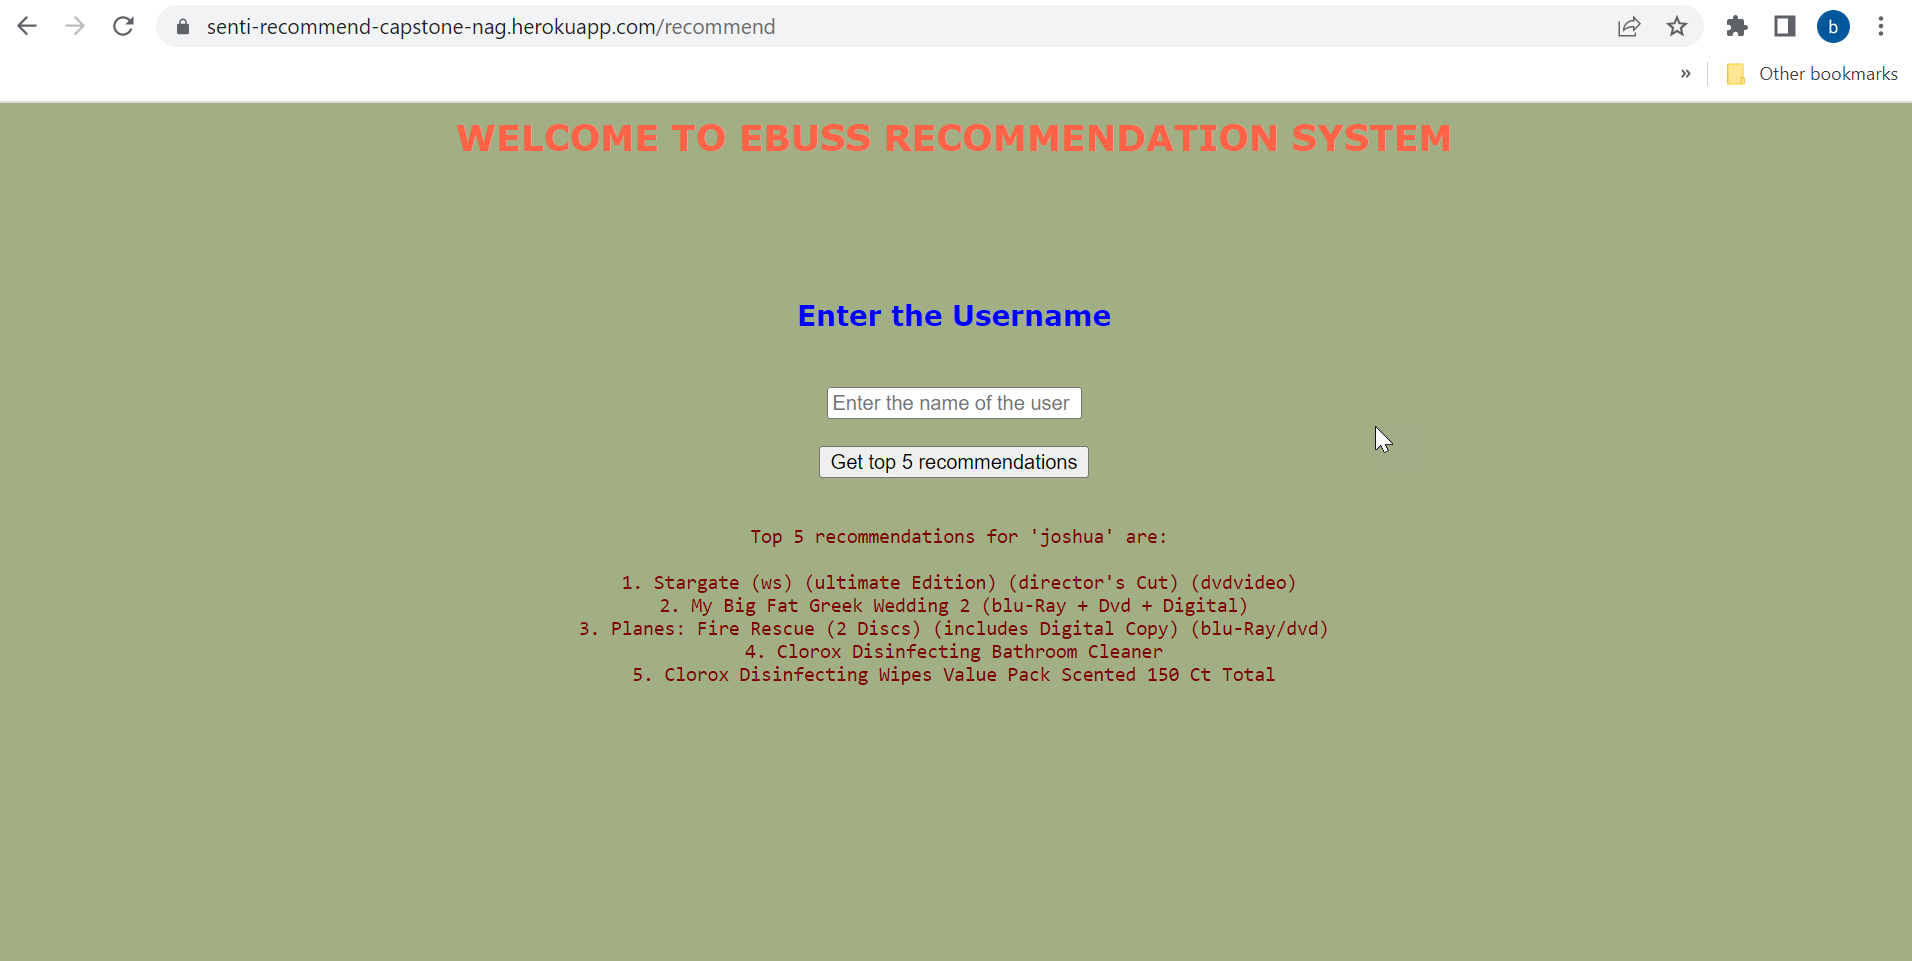